In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_excel("D:\Bill-of-Materials Project\Trade Data\Trade Data.xlsx")
# data=pd.read_excel("D:/Bill-of-Materials Project/Trade Data/Trade Data Remainder.xlsx")
print(data.head())

                             Product                Exporter Exporter Country  \
0   N - NITROSO ISOPROPYLETHYL AMINE  ClearsynthLabs Limited            India   
1   N - NITROSO ISOPROPYLETHYL AMINE  ClearsynthLabs Limited            India   
2   N - NITROSO ISOPROPYLETHYL AMINE  ClearsynthLabs Limited            India   
3   N - NITROSO ISOPROPYLETHYL AMINE  ClearsynthLabs Limited            India   
4   N - NITROSO ISOPROPYLETHYL AMINE  ClearsynthLabs Limited            India   

            Importer Importer Country Importer Port Amount  Year  \
0  CLEARSYNTH CANADA           Canada      Montreal     37  2025   
1  CLEARSYNTH CANADA           Canada      Montreal  74.85  2024   
2  CLEARSYNTH CANADA           Canada      Montreal     77  2024   
3  CLEARSYNTH CANADA           Canada      Montreal     39  2024   
4  CLEARSYNTH CANADA           Canada      Montreal     12  2023   

  Relevant Precursor  Exporter Port  Frequency  
0                 NaN           NaN        NaN  
1     

Exporter Country object
Importer Country object
Product object
Importer Port object
Exporter Port object
Exporter object
Importer object
Number of nodes: 23


C:\Users\rashi\AppData\Local\Temp\ipykernel_41572\3349208390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fentanyl_data[i]=fentanyl_data[i].str.upper()


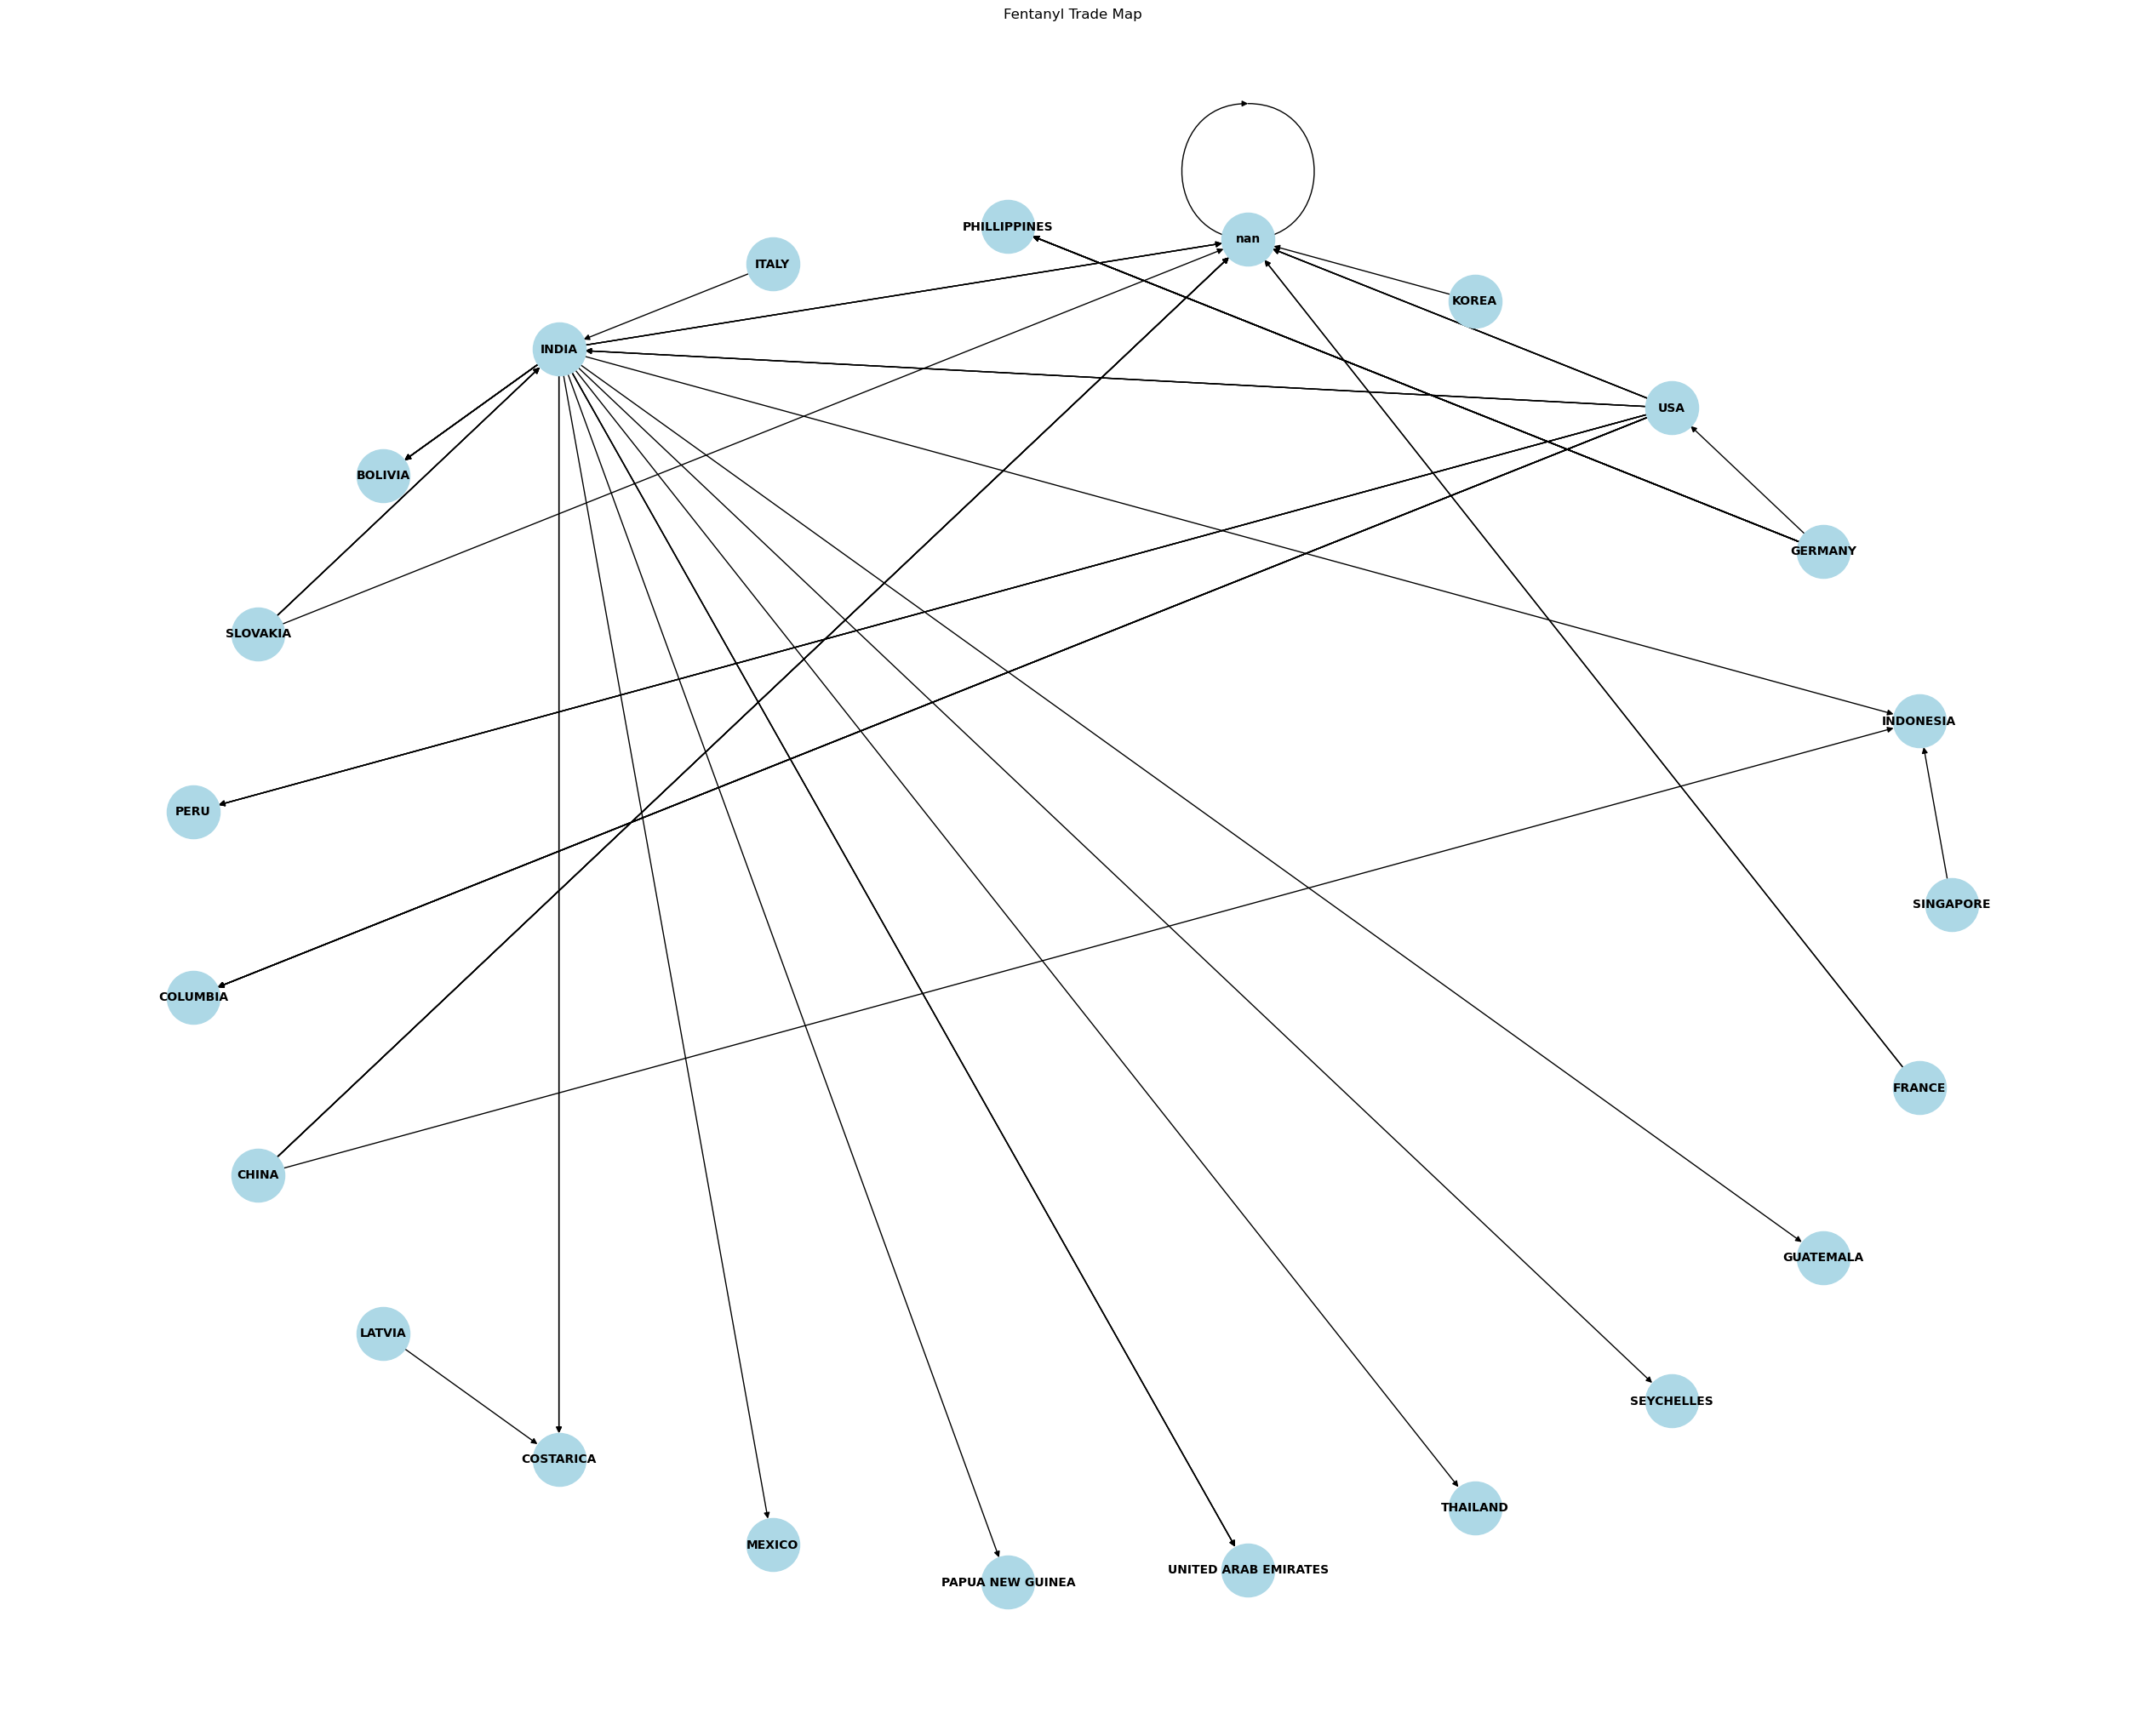

In [3]:
#Who is trading Fentanyl?
fentanyl_data=data[(data['Product']=="Fentanyl") | (data['Product']=="Fentanyl Hydrochloride")]
# print(fentanyl_data)
for i in ['Exporter Country','Importer Country','Product','Importer Port','Exporter Port','Exporter','Importer']:
    print(i,fentanyl_data[i].dtype)
    if fentanyl_data[i].dtype == 'object':
        fentanyl_data[i]=fentanyl_data[i].str.upper()
G=nx.MultiDiGraph()
for i,row in fentanyl_data.iterrows():
    G.add_edge(row['Exporter Country'],row['Importer Country'],label=row['Product'])
pos=nx.circular_layout(G)
fig_size = plt.figure(figsize=(25,20))

nx.draw(G,pos,with_labels=True,node_size=2000,node_color="lightblue",font_size=10,font_weight="bold",arrows=True)
# edge_labels=nx.get_edge_attributes(G,'label')
# nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_color='red')
plt.title("Fentanyl Trade Map")
print("Number of nodes:", G.number_of_nodes())

In [4]:
with open("D:\Bill-of-Materials Project\BOM Analysis\chemicals.txt", "r") as f:
    loaded_list = [line.strip() for line in f]
loaded_list = [x.upper() for x in loaded_list]
print(loaded_list)

['4-ANILINOPYRIDINE', 'N,N-BIS(2-METHOXYCARBONYLETHYL)PHENETHYLAMINE', 'NPP N PHENYL-IMINE', 'PLATINUM OXIDE', 'ANPP HYDROCHLORIDE', 'ANPP', 'POLYETHYLENE GLYCOL', 'MOLECULAR SIEVE', 'METHYL ACRYLATE', 'N-(4-PYRIDIL)-PROPIONANILIDE', 'PHENETHYLAMINE', 'SODIUM CHLORIDE', '4-METHYL-2-PENTANONE', 'SODIUM TRIACETOXYBOROHYDRIDE', 'SODIUM HYDROXIDE', 'TBAB', 'TEBA', 'CHLOROFORM', 'N-HEXANE', 'BENZENE', 'PHENYLETHYLCHLORIDE', '1-PHENYLETHYL-4-PROPIONANILINOPYRIDINIUM BROMIDE', 'DICHLOROMETHANE', 'PALLADIUM ON CARBON', 'NITROGEN', 'ANILINE HYDROCHLORIDE', '1-BENZYL-4-ANILINOPIPERIDINE', 'TRIETHYL AMINE', 'METHANOL', 'SODIUM SULPHATE', 'SODIUM BOROHYDRIDE', 'FENTANYL HYDROCHLORIDE', 'NORFENTANYL', 'ETHANOL', '4-PIPERIDONE HYDROCHLORIDE', 'PHENETHYL TOSYLATE', 'LITHIUM ALUMINIUM HYDRIDE', 'ACETONE', '1-BENZYL-4-N-PROPIONYL-ANLINOPIPERIDINE', 'SODIUM CARBONATE', 'DICHLOROETHANE', 'DIPEA', 'PROPIONYL CHLORIDE', 'PIRYDILPYRIDINIUM CHLORIDE', 'ANILINE', 'SODIUM METHOXIDE', 'HYDROCHLORIC ACID', 'POTA

In [5]:
#How many unique products are there?
data['Product']=data['Product'].str.upper()
items_identified=data['Product'].unique()
print(items_identified)
traced_item=[x for x in loaded_list if x in items_identified]
print(len(traced_item))
print(sorted(traced_item))
untraced_item=[x for x in loaded_list if x not in items_identified]
print(len(untraced_item))
print(sorted(untraced_item))
# untraced_items=set(complete_list).difference(set(items_identified))
# print(len(untraced_items))
# print(untraced_items)
# print(data['Product'].unique())
print(len(data['Product'].unique()))
# mexico_data=data[data['Importer Country']=='Mexico']
# china_data=data[data['Exporter Country']=='China']
# india_data=data[data['Exporter Country']=='India']
# canada_data=data[data['Importer Country']=='Canada']
# print(len(mexico_data['Product'].unique()))
# print(len(canada_data['Product'].unique()))
# print(len(china_data['Product'].unique()))
# print(len(india_data['Product'].unique()))
# mc_data=data[data['Importer Country'].isin(['Mexico','Canada'])]
# print(len(mc_data['Product'].unique()))
# ic_data=data[data['Exporter Country'].isin(['India','China'])]
# print(len(ic_data['Product'].unique()))
# mcic_data=data[data['Importer Country'].isin(['Mexico','Canada']) & data['Exporter Country'].isin(['India','China'])]
# print(len(mcic_data['Product'].unique()))

['\xa0N - NITROSO ISOPROPYLETHYL AMINE' '1-METHYL-4-PIPERIDONE'
 '3-AMINO PIPERIDINE-2,6-DIONE HYDROCHLORIDE' '4-METHYL-2-PENTANONE'
 '4-PIPERIDONE HYDROCHLORIDE' '4-PIPERIDONE\xa0HYDROCHLORIDE '
 'ACETIC ACID' 'ACETONE' 'ACETONITRILE' 'ANILINE' 'ANILINE HYDROCHLORIDE'
 'ANPP' 'BENZENE' 'CESIUM CARBONATE' 'CHLOROFORM' 'DICHLOROETHANE'
 'DICHLOROMETHANE' 'DIPEA' 'ETHANOL' 'ETHYL ACETATE' 'ETHYL CHLOROFORMATE'
 'FENTANYL' 'FENTANYL HYDROCHLORIDE' 'HYDROGEN'
 'LITHIUM ALUMINIUM HYDRIDE' 'METHANOL' 'METHYL ACRYLATE'
 'MOLECULAR SIEVE' 'N,N,-DIMETHYL ANILINE' 'N-HEXANE' 'NITROGEN'
 'N-NITROSODIISOPROPYLAMINE-D14' 'N-NITROSODIISOPROPYLAMINE-D15'
 'N-NITROSODIISOPROPYLAMINE-D16' 'N-NITROSODIISOPROPYLAMINE-D17'
 'N-NITROSODIISOPROPYLAMINE-D18' 'N-NITROSODIISOPROPYLAMINE-D19'
 'N-NITROSODIISOPROPYLAMINE-D20' 'PALLADIUM ON CARBON' 'PHENYL BUTENAL'
 'PHENYL ETHYL ACETATE' 'PHENYLACETALDEHYDE' 'PHENETHYL BROMIDE'
 'PIPERIDINE' 'PLATINUM OXIDE' 'POLYETHYLENE GLYCOL' 'POTASSIUM CARBONATE'
 'POTASSIU

Number of nodes: 572


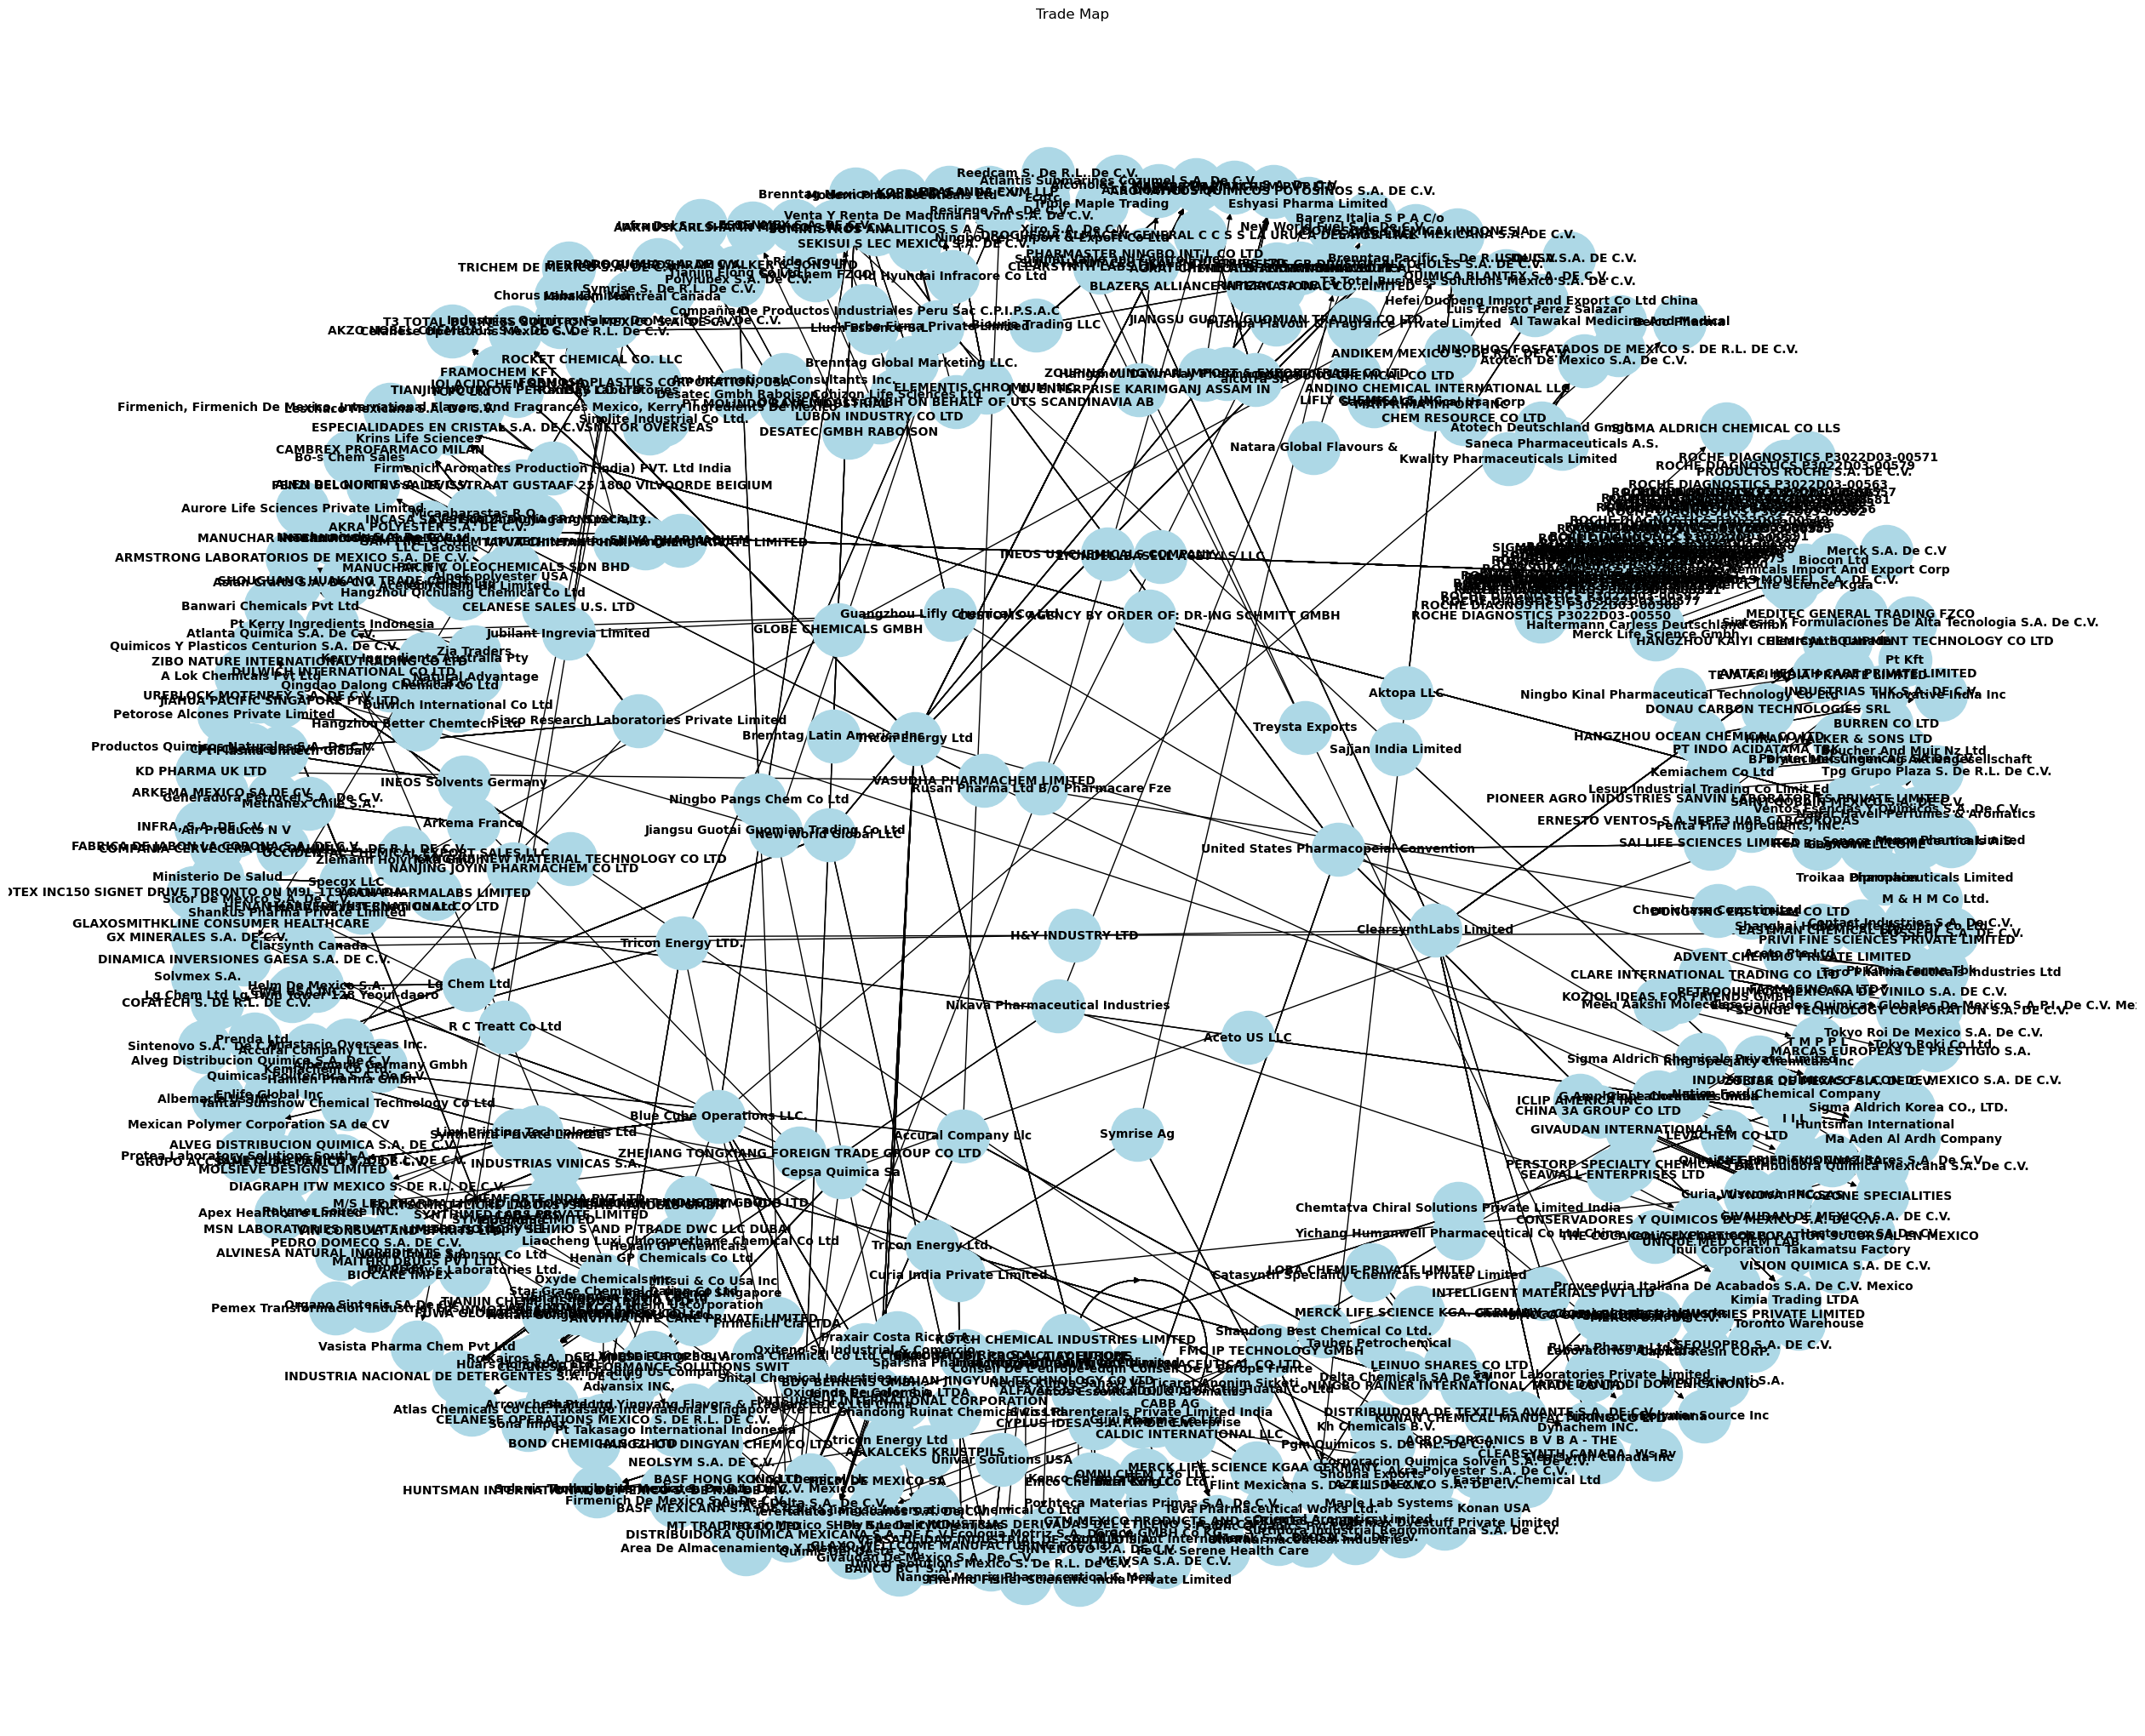

In [9]:
G=nx.MultiDiGraph()
for i,row in data.iterrows():
    G.add_edge(row['Exporter'],row['Importer'],label=row['Product'])
pos=nx.spring_layout(G)
fig_size = plt.figure(figsize=(25,20))

nx.draw(G,pos,with_labels=True,node_size=2000,node_color="lightblue",font_size=10,font_weight="bold",arrows=True)
# edge_labels=nx.get_edge_attributes(G,'label')
# nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_color='red')
plt.title("Trade Map")
print("Number of nodes:", G.number_of_nodes())

Number of nodes: 72


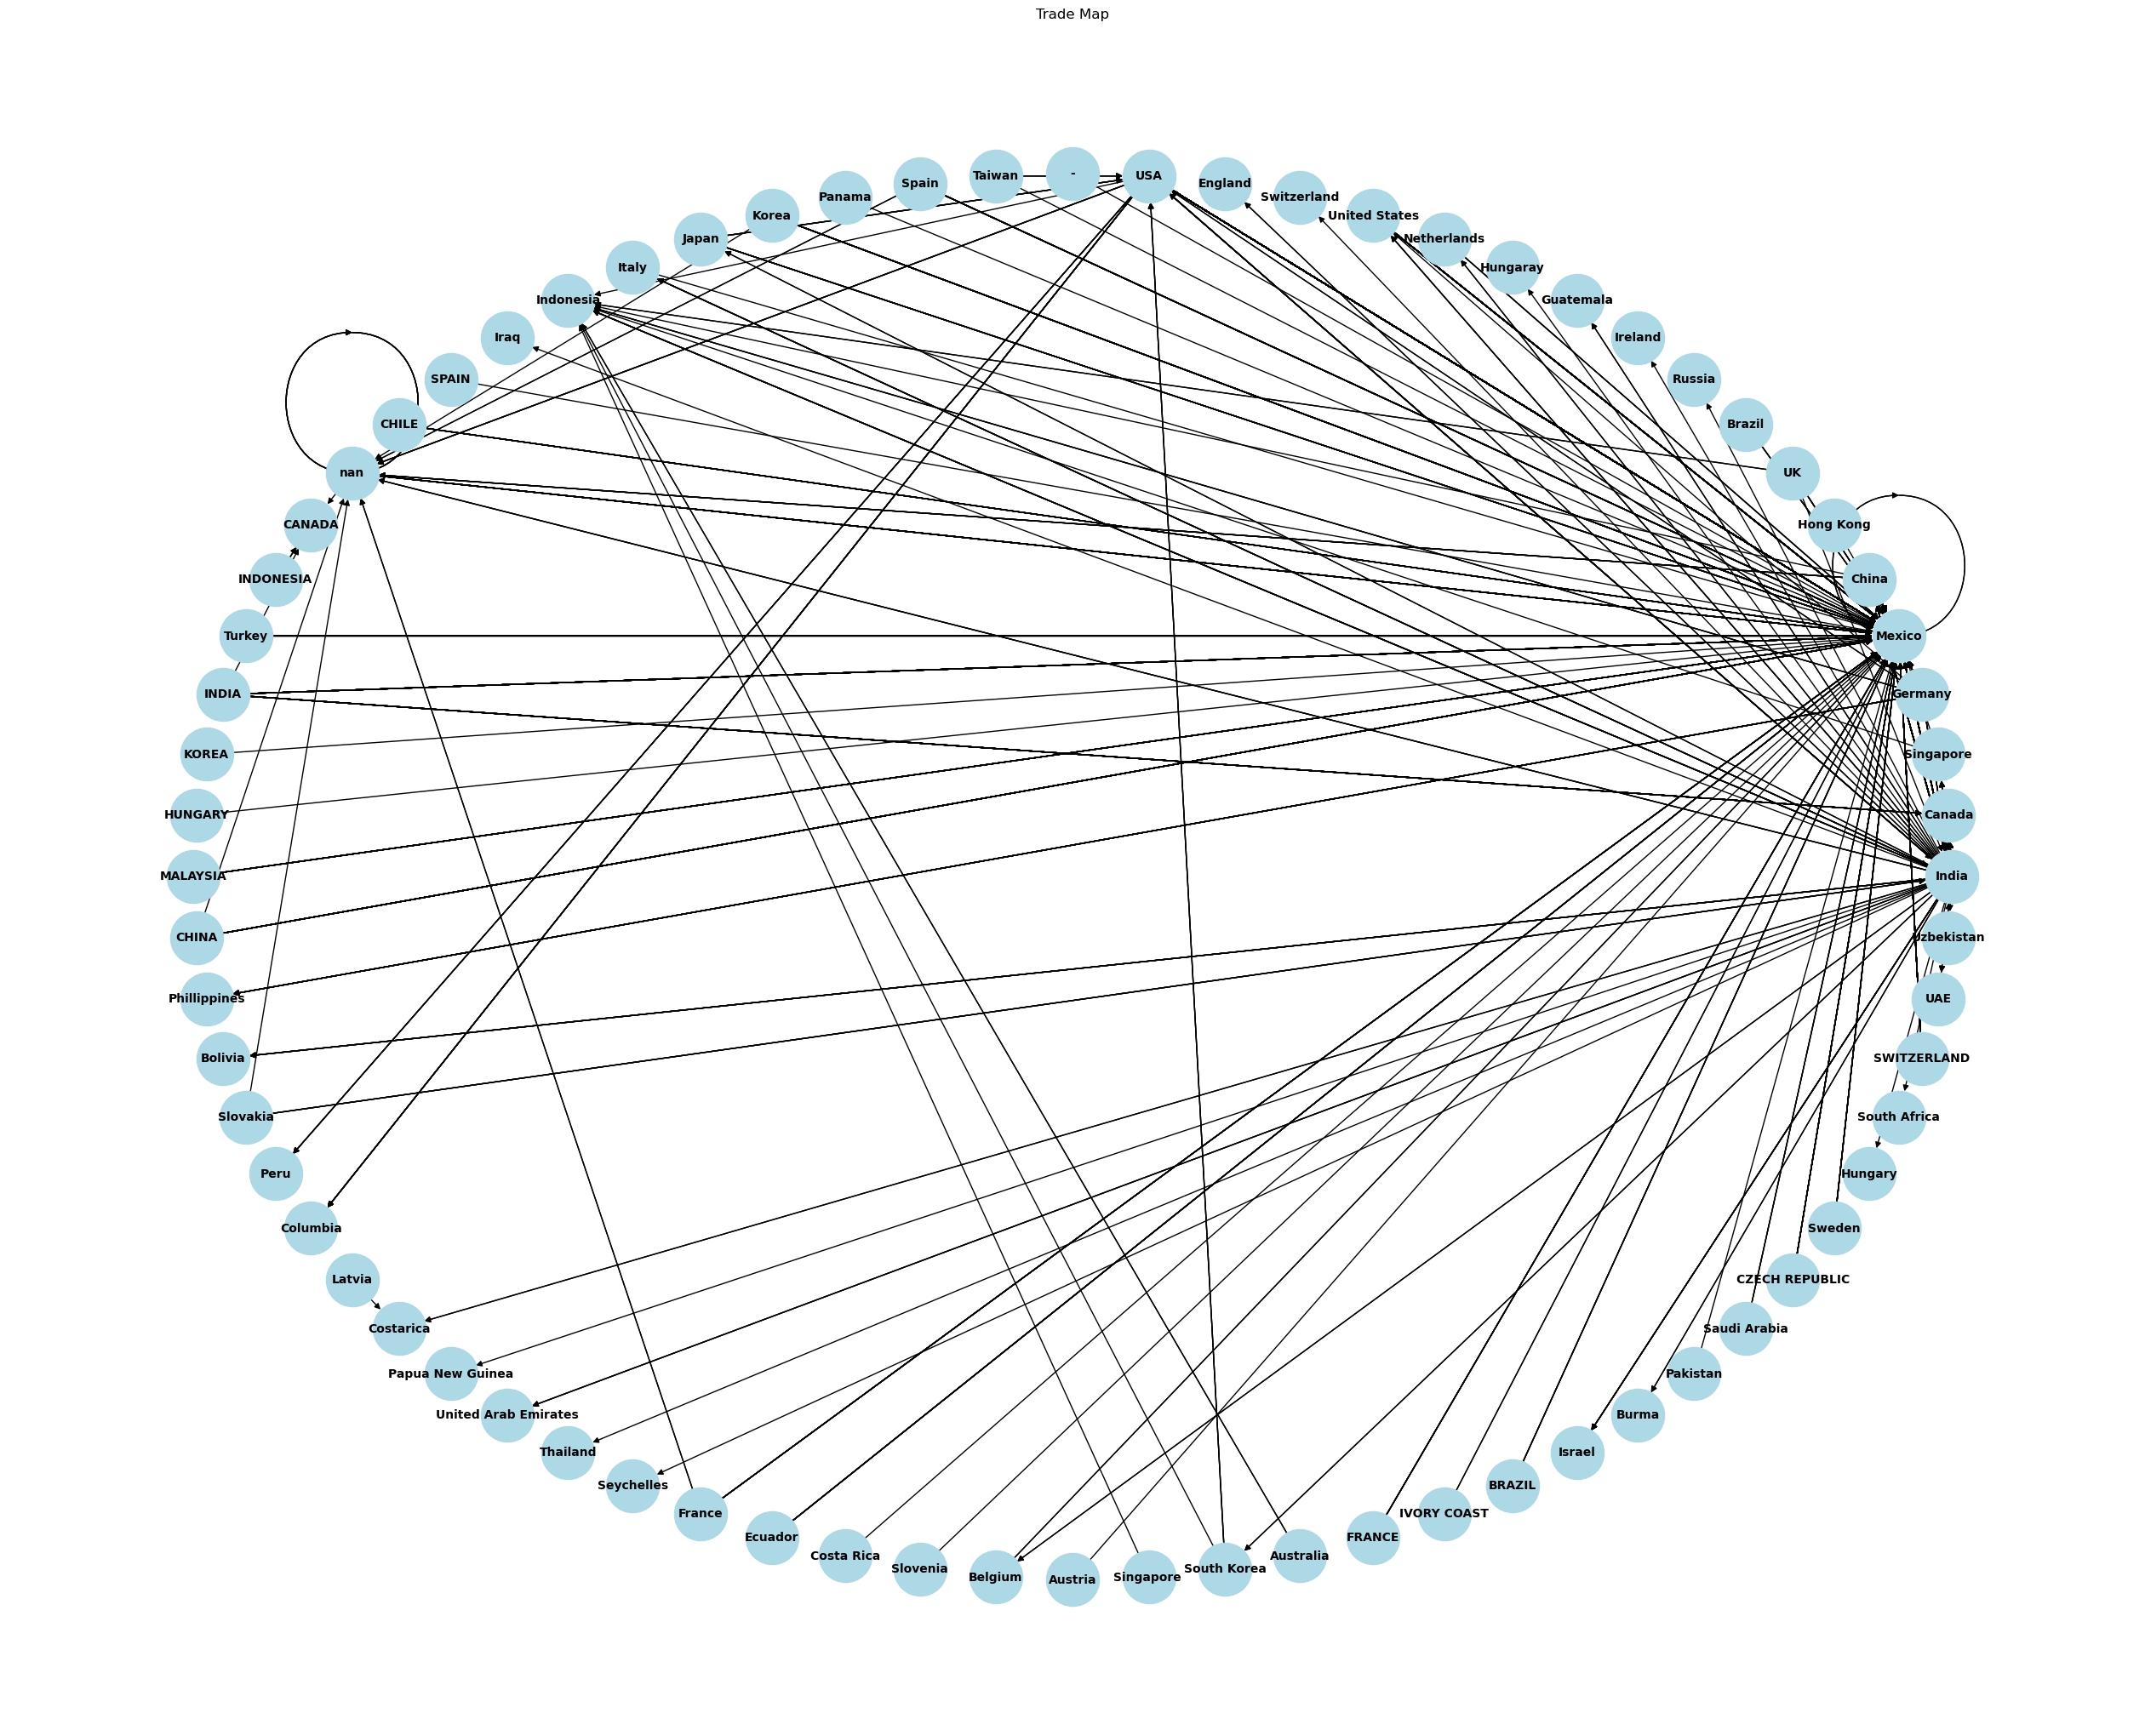

In [10]:
G=nx.MultiDiGraph()
for i,row in data.iterrows():
    G.add_edge(row['Exporter Country'],row['Importer Country'],label=row['Product'])
pos=nx.circular_layout(G)  
fig_size = plt.figure(figsize=(25,20))

nx.draw(G,pos,with_labels=True,node_size=2000,node_color="lightblue",font_size=10,font_weight="bold",arrows=True)
# edge_labels=nx.get_edge_attributes(G,'label')
# nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_color='red')
plt.title("Trade Map")
print("Number of nodes:", G.number_of_nodes())

Number of nodes: 85


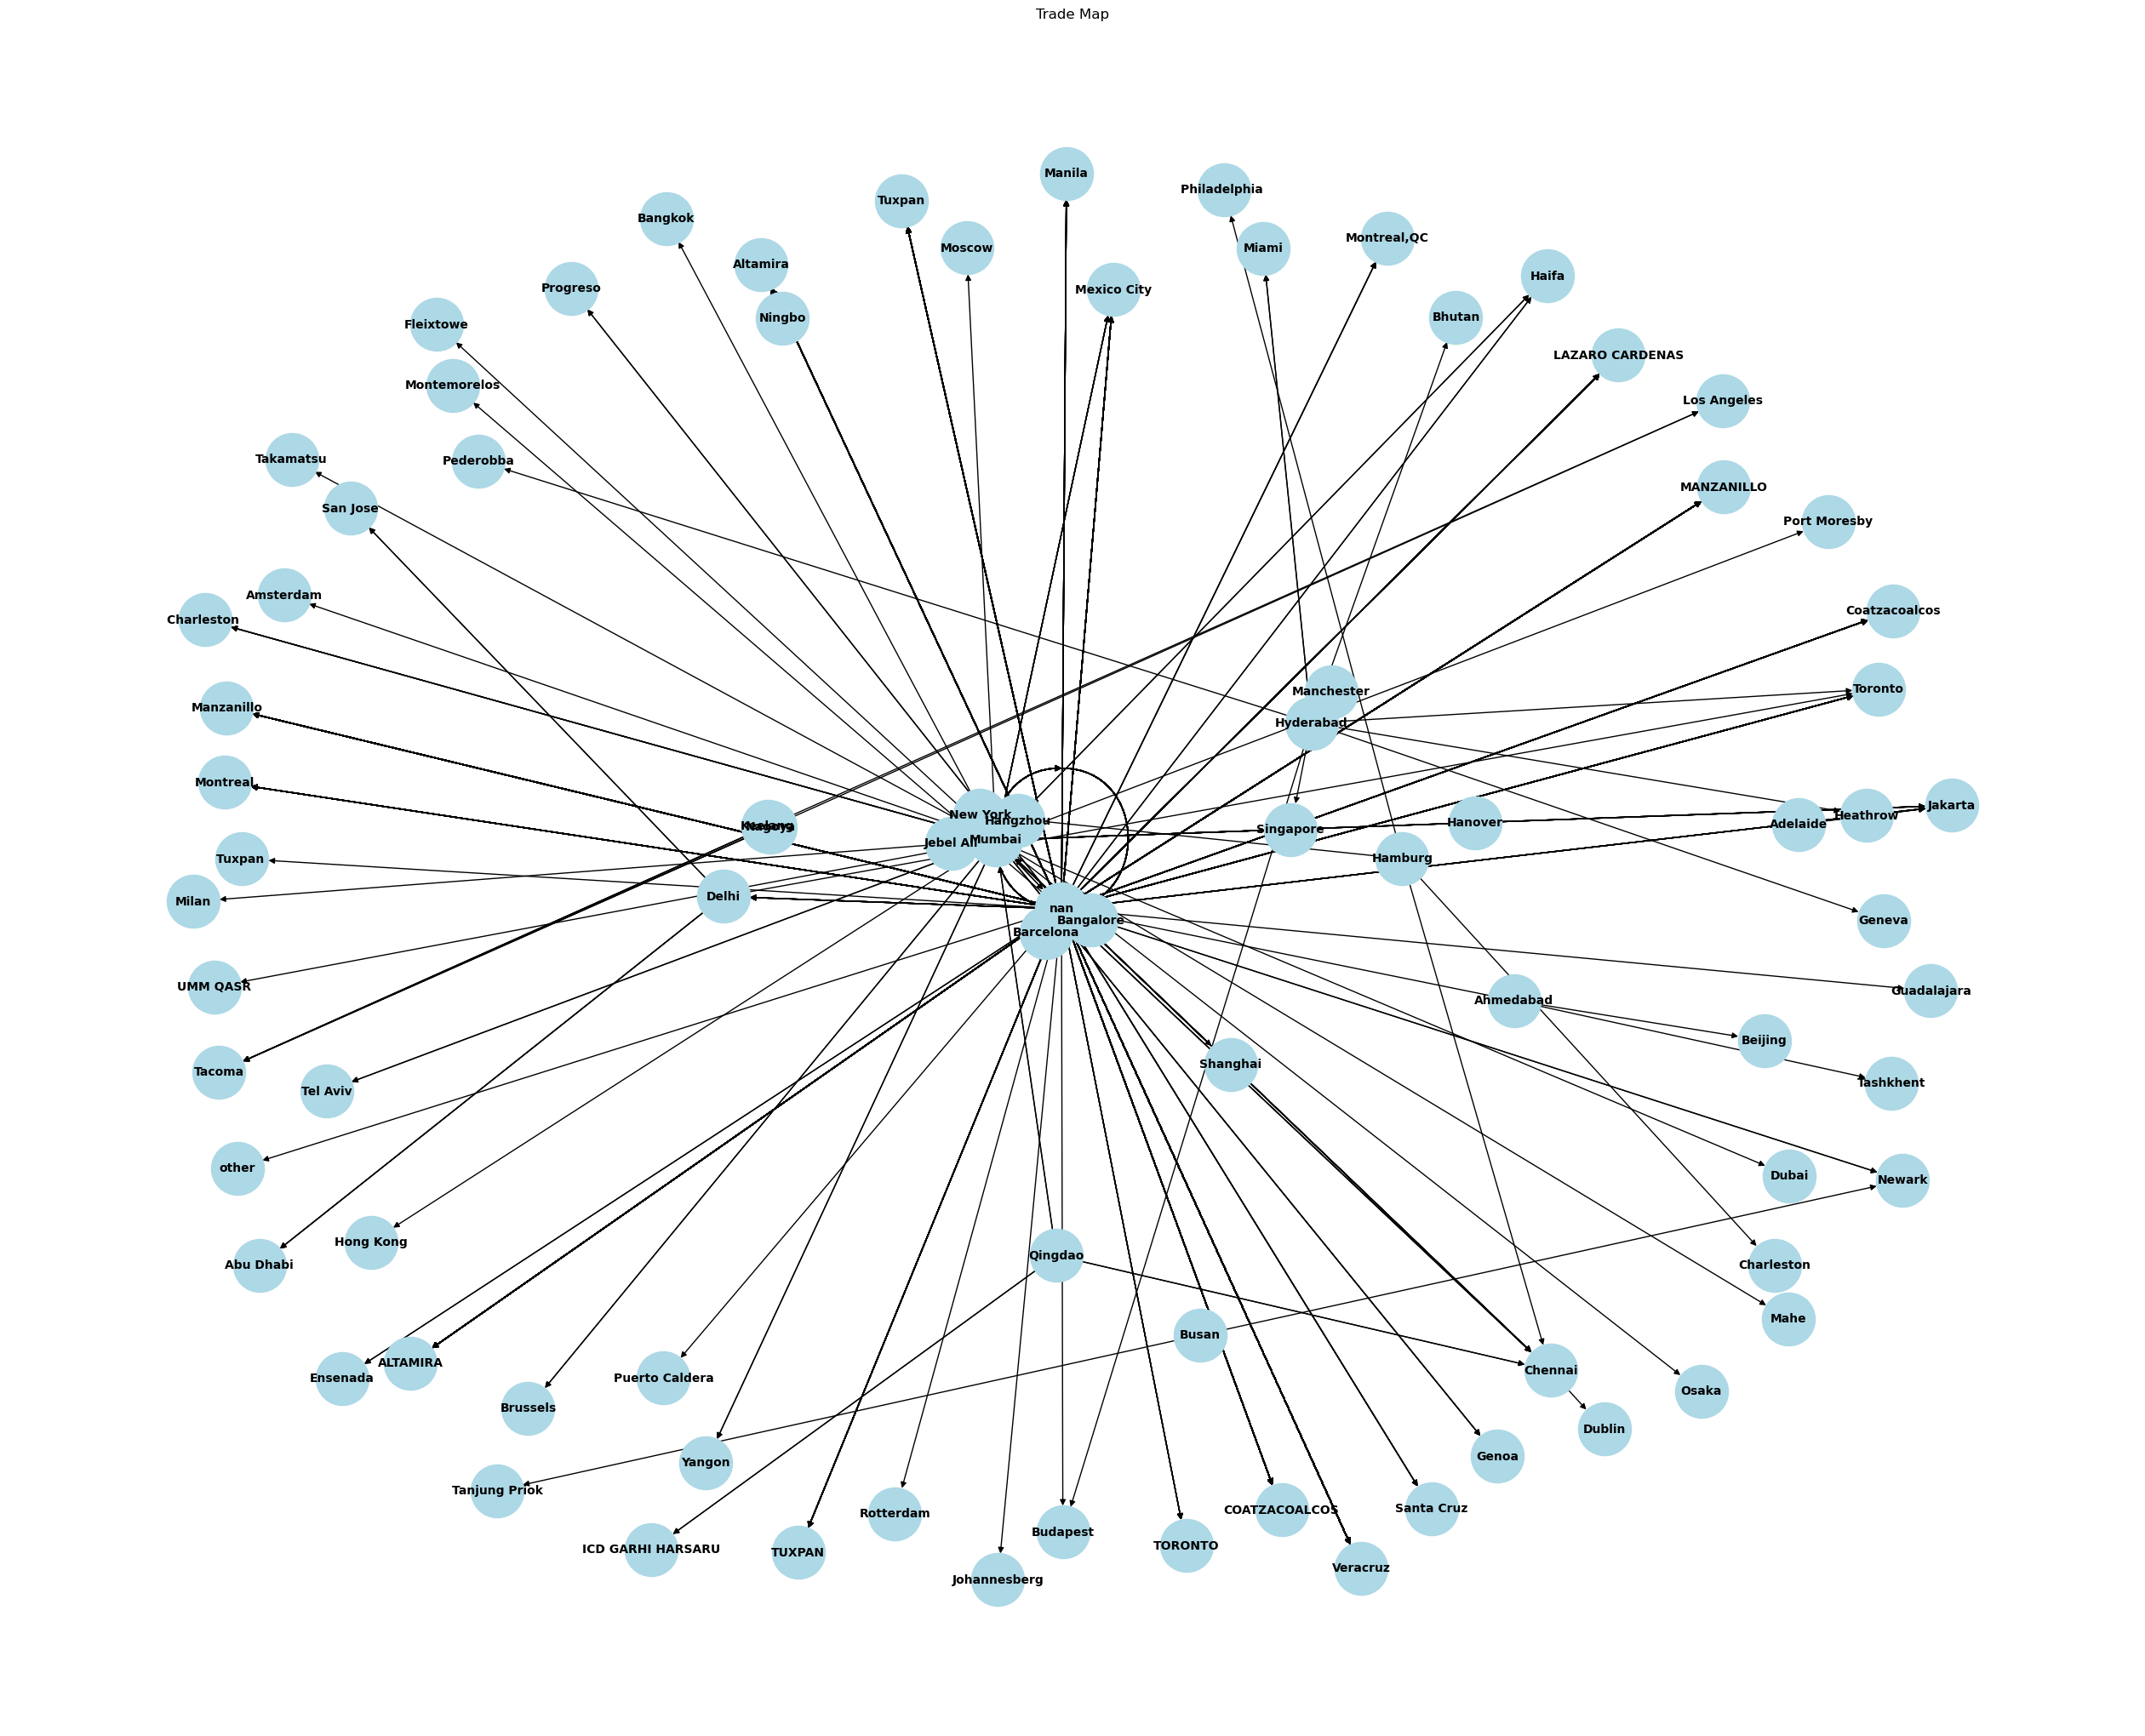

In [11]:
G=nx.MultiDiGraph()
for i,row in data.iterrows():
    G.add_edge(row['Exporter Port'],row['Importer Port'],label=row['Product'])
pos=nx.spring_layout(G)
fig_size = plt.figure(figsize=(25,20))

nx.draw(G,pos,with_labels=True,node_size=2000,node_color="lightblue",font_size=10,font_weight="bold",arrows=True)
# edge_labels=nx.get_edge_attributes(G,'label')
# nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_color='red')
plt.title("Trade Map")
print("Number of nodes:", G.number_of_nodes())